# Winter 2022 Data Science Intern Challenge

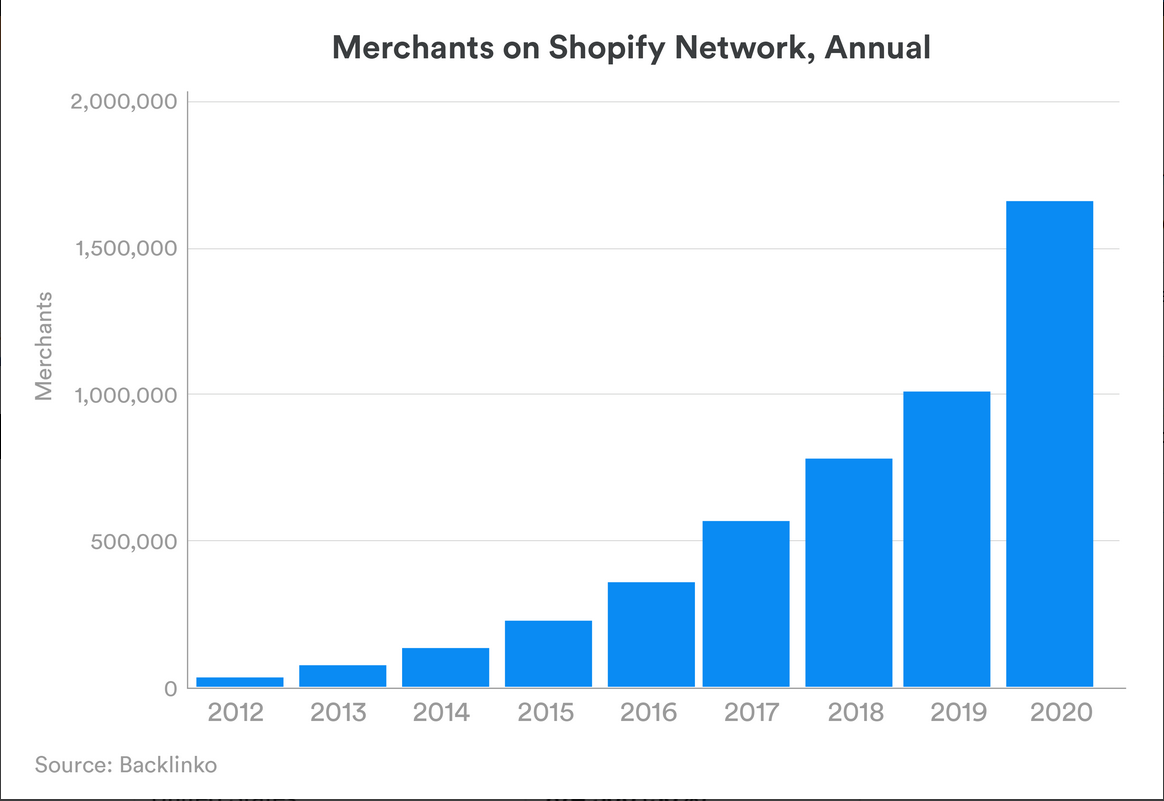

#### Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

## INTRODUCTION

##### Given some sample data, write a program to answer the following: 
- click here to access the required data set On Shopify, 
We have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. 
We want to do some analysis of the average order value (AOV). 
When we look at orders data over a 30 day window,
We naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, 
a relatively affordable item, something seems wrong with our analysis. 

In [216]:
import os
os.chdir(r'C:\Users\GUILLERMO\Desktop\Data Mining\CSV')
os.getcwd()

'C:\\Users\\GUILLERMO\\Desktop\\Data Mining\\CSV'

In [217]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

import warnings 
warnings.filterwarnings('ignore')

##### Load File Shopify CSV from pandas package

In [218]:
df_shopify = pd.read_csv('Shopify.csv')
display(df_shopify.head(10))

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} observations.'.format(df_shopify.shape[1], df_shopify.shape[0]))

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26



Inference: The Dataset consists of 7 features & 5000 observations.


In [219]:
df_shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [220]:
# Removal of any Duplicate rows (if any)
rs = df_shopify.shape[0]
df_shopify["Date"]=pd.to_datetime(df_2000.created_at)
df_shopify["weekday"] = df_shopify.Date.dt.weekday
df_shopify["day"] = df_shopify.Date.dt.day
df_shopify.drop(["Date"], axis=1, inplace=True) 
df_shopify["suspicious"]= df_shopify["order_amount"] / df_shopify["total_items"]  
df_shopify.drop_duplicates(inplace=True)
if df_shopify.shape[0]==(rs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df_shopify.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [221]:
df_shopify.describe()

,order_id,shop_id,user_id,order_amount,total_items,weekday,day,suspicious
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,17.000000,17.000000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,3.176471,16.176471,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,1.845105,9.442161,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,1.000000,2.000000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,1.000000,7.000000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,3.000000,17.000000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,5.000000,24.000000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,6.000000,28.000000,25725.000000


##### We confirm that mean of order_amount is 3,145.13 (AOV)

total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
dtype: int64


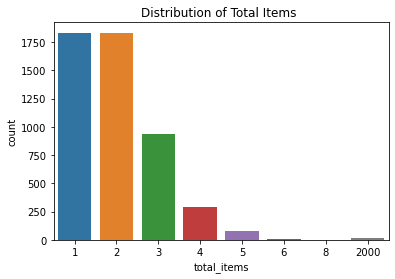

In [222]:
##Lets see the distribution of total_items
print(df_shopify.groupby('total_items').size())
sns.countplot(df_shopify['total_items'],label="Count")
plt.title("Distribution of Total Items ")
plt.show()

#### Inference: there's something atypical happening when we inspect how many transactions are made for each transaction size. All of the transaction sizes are 8 items or smaller, except for the 17 of size 2000. I will analisys this transaction in detail.

In [223]:
df_2000 = df_shopify.loc[df_shopify['total_items'] == 2000] 
df_2000.sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,weekday,day,suspicious
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,3.0,2.0,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,3.0,2.0,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,5.0,4.0,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,1.0,7.0,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,1.0,7.0,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,5.0,11.0,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,6.0,12.0,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2.0,15.0,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,4.0,17.0,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,6.0,19.0,352.0


created_at
2017-03-02 4:00:00    2
2017-03-04 4:00:00    1
2017-03-07 4:00:00    2
2017-03-11 4:00:00    1
2017-03-12 4:00:00    1
2017-03-15 4:00:00    1
2017-03-17 4:00:00    1
2017-03-19 4:00:00    1
2017-03-22 4:00:00    1
2017-03-24 4:00:00    2
2017-03-25 4:00:00    1
2017-03-28 4:00:00    3
dtype: int64


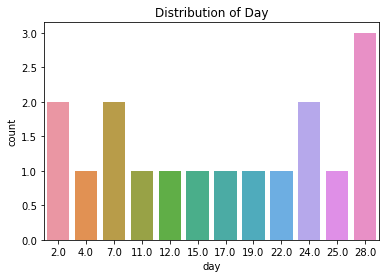

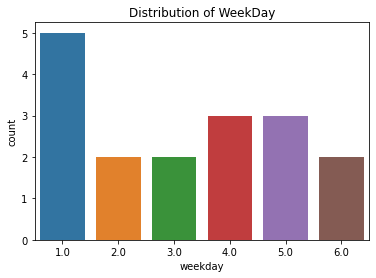

In [224]:
##Lets see the distribution of created_at for 2000 sizes
print(df_2000.groupby('created_at').size())
sns.countplot(df_2000['day'],label="Count")
plt.title("Distribution of Day")
plt.show()
sns.countplot(df_2000['weekday'],label="Count")
plt.title("Distribution of WeekDay")
plt.show()

We see that all of the recorded transactions of size 2000 occurred from the same user_id (607) 
the same shop_id (42), and that the order_amount is exactly the same in each case (704000).
Moreover, we see that there are some days(2,7,24,28) of the month where there are multiple identical transactions,
and all purchases are made at exactly 4 a.m. o clock, and 5 of 17 were created on Monday.
I presume that this customer is automating process of buying shoes in bulk.

In [225]:
df_2000.describe()

,order_id,shop_id,user_id,order_amount,total_items,weekday,day,suspicious
count,17.000000,17.0,17.0,17.0,17.0,17.000000,17.000000,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0,3.176471,16.176471,352.0
std,1603.584872,0.0,0.0,0.0,0.0,1.845105,9.442161,0.0
min,16.000000,42.0,607.0,704000.0,2000.0,1.000000,2.000000,352.0
25%,1363.000000,42.0,607.0,704000.0,2000.0,1.000000,7.000000,352.0
50%,2154.000000,42.0,607.0,704000.0,2000.0,3.000000,17.000000,352.0
75%,3333.000000,42.0,607.0,704000.0,2000.0,5.000000,24.000000,352.0
max,4883.000000,42.0,607.0,704000.0,2000.0,6.000000,28.000000,352.0


In [226]:
ML=df_shopify.groupby(['total_items']).agg({'suspicious':'describe'})
ML

suspicious                                                        \
                 count         mean          std    min    25%    50%    75%   
total_items                                                                    
1               1830.0   417.364481  2593.090627   90.0  132.0  153.0  169.0   
2               1832.0   375.107533  2380.286081   90.0  132.0  153.0  168.0   
3                941.0   397.025505  2490.386716   90.0  134.0  153.0  168.0   
4                293.0   236.921502  1494.408229   90.0  130.0  148.0  165.0   
5                 77.0   151.870130    32.234891   90.0  134.0  153.0  163.0   
6                  9.0  2990.000000  8525.644023  129.0  131.0  158.0  160.0   
8                  1.0   133.000000          NaN  133.0  133.0  133.0  133.0   
2000              17.0   352.000000     0.000000  352.0  352.0  352.0  352.0   

                      
                 max  
total_items           
1            25725.0  
2            25725.0  
3            25725.0  
4            25725.0  
5              352.0  
6            25725.0  
8              133.0  
2000           352.0

#### We determine outliers in this dataset and check how affect this outliers the mean. 

In [227]:
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    df_out =df[(df_shopify[col]<LIF) | (df_shopify[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col]) #Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
    return df_out[col] .describe()

count       141.000000
mean     101407.638298
std      225491.524131
min         735.000000
25%         786.000000
50%        1056.000000
75%       51450.000000
max      704000.000000
Name: order_amount, dtype: float64

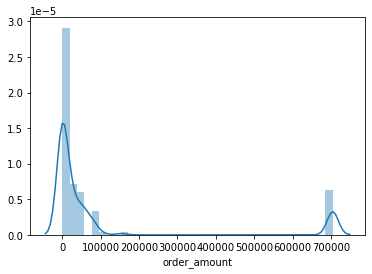

In [228]:
outlier_analysis('order_amount')

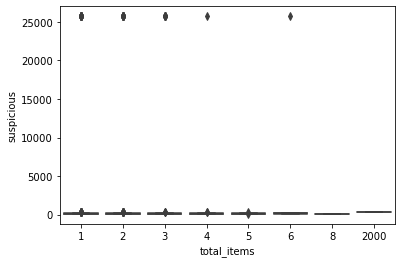

In [229]:
ax = sns.boxplot(x="total_items", y="suspicious", data=df_shopify)

In [230]:
print(f'\n\033[1mInference:\033[0m The median Order of Amount is--->{df_shopify["order_amount"].quantile(.5)}')


Inference: The median Order of Amount is--->284.0


### Question 1

#### Question 1a a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.?


•When using the AOV, we are blindly computing the average order amount without taking into account the number of pairs of shoes purchased in each transaction.

•Moreover, there are many transactions that seem questionable/erroneous:
The 17 indentical transactions that included 2000 purchases, Those records are not driving up significally the AOV(3152.13), because their mean is 352 for this group.
 
•When we group transactions by total_items we see unlikely maximum order amounts that are multiples of 25725 for       transaction sizes of 1, 2, 3, 4 and 6 items. These transactions are also driving up the AOV. (There are 141 Outliers driving up signically the mean, mean for outliers group is 101407.63 and max 704000.00).

#### Question 1b. What metric would you report for this dataset?

•Due to the extreme outliers it would be preferable to use a robust evaluation metric 
(one which isn't affected by extreme values as median).

#### Question 1c. What is its value?

• The median is 284 for this dataset, which is a more reasonable value for our measure of central tendancy 
than the mean (3145.13) given that we are talking about single-transaction purchases of shoes.

### Question 2

For this question you’ll need to use SQL. Follow this link to access the data set
required for the challenge. Please use queries to answer the following questions. 
Paste your queries along with your final numerical answers below.

###### Question 2a. How many orders were shipped by Speedy Express in total?

###### Answer: 54

SELECT count(OrderID) as [Number of Order] from Orders
LEFT JOIN Shippers on Orders.ShipperID = Shippers.ShipperID
Where TRIM(ShipperName) = 'Speedy Express'

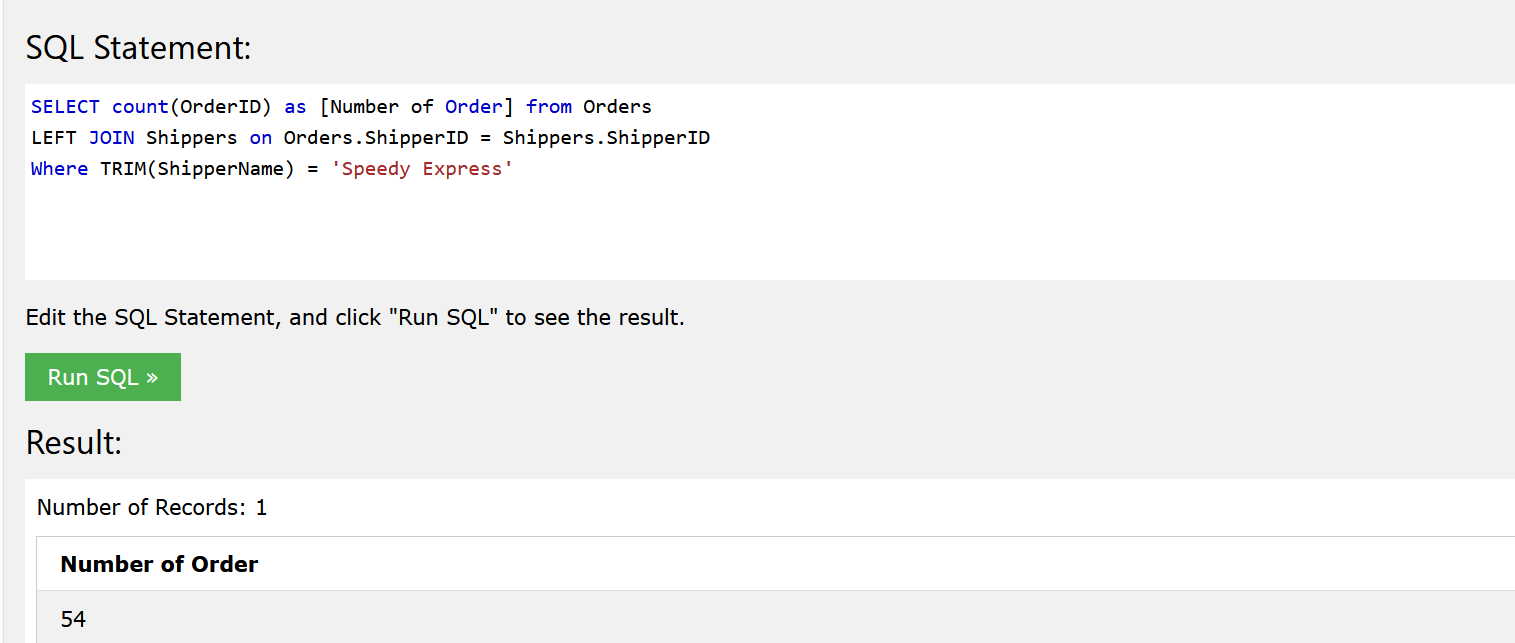

###### Question 2b. What is the last name of the employee with the most orders?
Answer: Peacock - 40 Orders

SELECT TOP 1 LastName, FirstName, count(OrderID) as [Number Orders] FROM Orders 
LEFT JOIN Employees on Orders.EmployeeID = Employees.EmployeeID
GROUP BY LastName, FirstName
ORDER BY COUNT(OrderID) DESC;

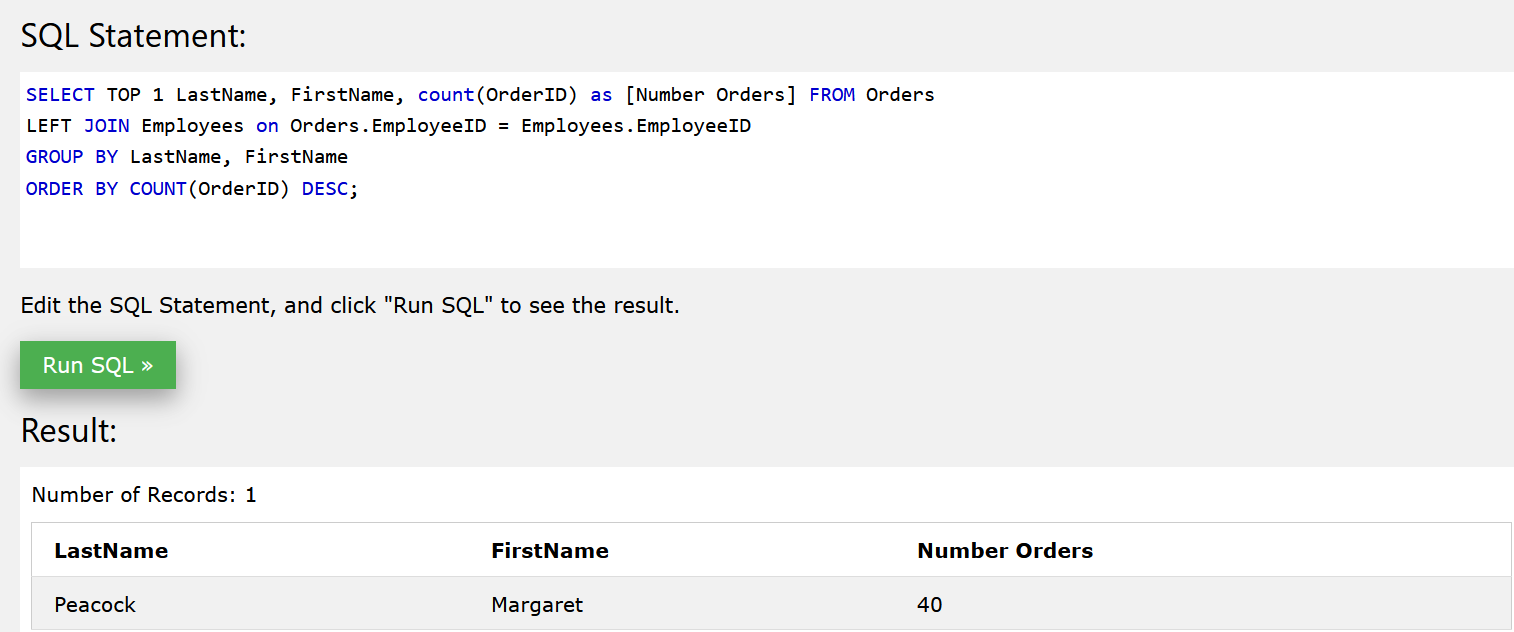

###### Question 2c. c.	What product was ordered the most by customers in Germany?
Answer: Boston Crab Meat
(ProductID: 40, TotalQuantity: 160)

SELECT TOP 1 t.ProductID, p.ProductName [Most ordered Product Name] , sum(t.Quantity) [Total quantity]
From Customers As c 
LEFT JOIN Orders As o 
     ON o.CustomerID = c.CustomerID and c.Country = 'Germany'
LEFT JOIN OrderDetails As t 
     ON t.OrderID = o.OrderID  
LEFT JOIN Products As p
     ON p.ProductID = t.ProductID  
GROUP BY t.ProductID, ProductName
ORDER BY [Total quantity] DESC;

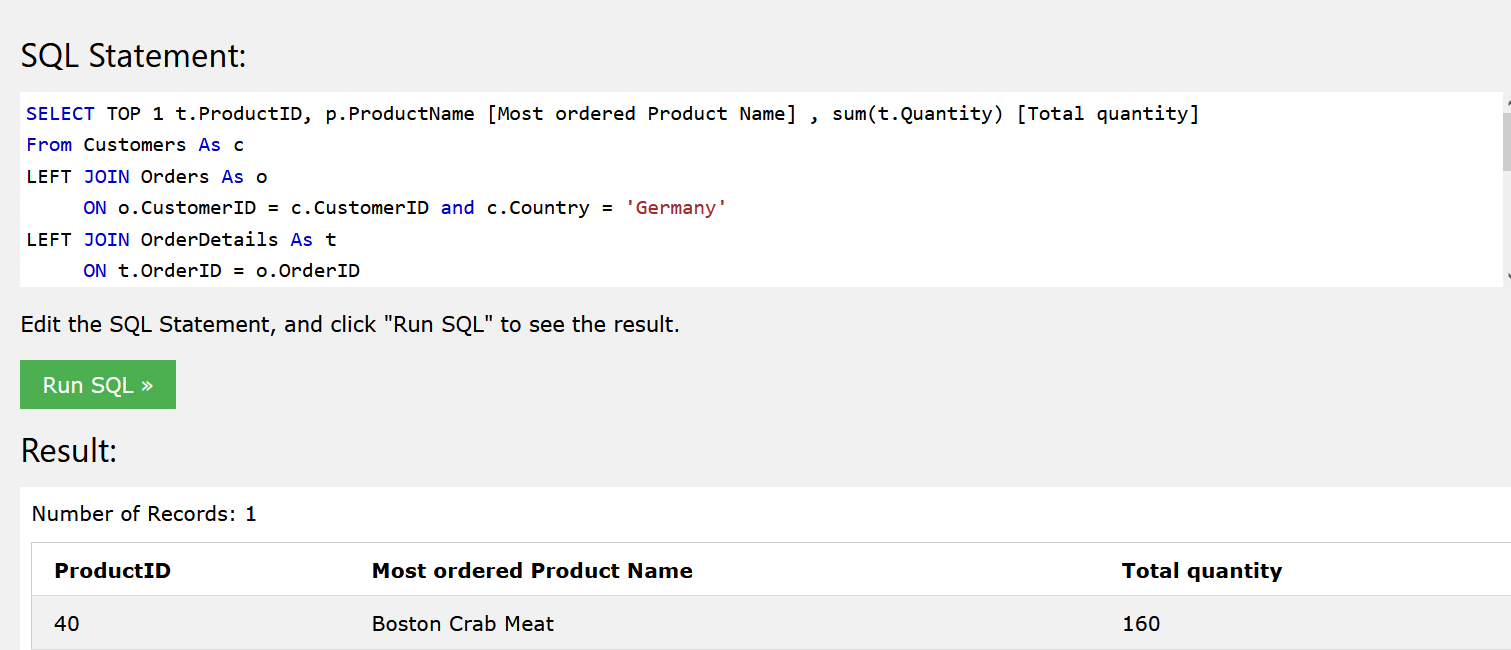